In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
import datetime

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['hawaii_measure', 'hawaii_station']

In [4]:
measure = Base.classes.hawaii_measure
station = Base.classes.hawaii_station

In [5]:
session = Session(engine)

In [10]:
sel = [measure.date, func.avg(measure.prcp)]

lastyear = session.query(*sel).filter(measure.date >= datetime.date(2017,5,2)).group_by(measure.date).all()
lastyear

[('2017-05-02', 0.008333333333333333),
 ('2017-05-03', 0.006),
 ('2017-05-04', 0.016),
 ('2017-05-05', 0.06333333333333334),
 ('2017-05-06', 0.01),
 ('2017-05-07', 0.024),
 ('2017-05-08', 0.5016666666666666),
 ('2017-05-09', 0.9260000000000002),
 ('2017-05-10', 0.14333333333333334),
 ('2017-05-11', 0.12),
 ('2017-05-12', 0.032),
 ('2017-05-13', 0.048),
 ('2017-05-14', 0.244),
 ('2017-05-15', 0.176),
 ('2017-05-16', 0.06999999999999999),
 ('2017-05-17', 0.025000000000000005),
 ('2017-05-18', 0.14166666666666666),
 ('2017-05-19', 0.01),
 ('2017-05-20', 0.0075),
 ('2017-05-21', 0.002),
 ('2017-05-22', 0.072),
 ('2017-05-23', 0.11833333333333333),
 ('2017-05-24', 0.6483333333333333),
 ('2017-05-25', 0.37000000000000005),
 ('2017-05-26', 0.004),
 ('2017-05-27', 0.085),
 ('2017-05-28', 0.06833333333333334),
 ('2017-05-29', 0.084),
 ('2017-05-30', 0.346),
 ('2017-05-31', 0.074),
 ('2017-06-01', 0.006666666666666667),
 ('2017-06-02', 0.06799999999999999),
 ('2017-06-03', 0.122),
 ('2017-06-04'

In [13]:
prcp_df = pd.DataFrame(lastyear, columns = ['date','prcp'])
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2017-05-02,0.008333
2017-05-03,0.006000
2017-05-04,0.016000
2017-05-05,0.063333
2017-05-06,0.010000


In [26]:
sel = [measure.station, func.count(measure.date)]

station_info = session.query(*sel).group_by(measure.station).order_by(func.count(measure.date).desc()).all()
station_info

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [21]:
len(station_info)

9

In [31]:
sel = [measure.date, measure.tobs]

lastyeartemp = session.query(*sel).filter(measure.date >= datetime.date(2017,5,2)).filter(measure.station == "USC00519281").group_by(measure.date).all()

tobs_df = pd.DataFrame(lastyeartemp, columns = ['date','tobs'])
tobs_df.head()

,date,tobs
0,2017-05-02,75
1,2017-05-03,70
2,2017-05-04,75
3,2017-05-05,70
4,2017-05-06,79


(array([9., 8., 8., 8., 9., 8., 8., 8., 9., 8., 8., 9.]),
 array([ 0.  ,  8.25, 16.5 , 24.75, 33.  , 41.25, 49.5 , 57.75, 66.  ,
        74.25, 82.5 , 90.75, 99.  ]),
 <a list of 12 Patch objects>)

C:\Users\conle\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


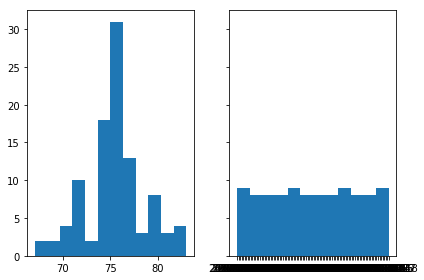

In [34]:
n_bins = 12

x = tobs_df['tobs']
y = tobs_df['date']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

In [48]:
temp_data = []
start_datey = 2018
start_datem = 5
start_dated = 14
end_datey = 2018
end_datem = 5
end_dated = 16
start_datey = start_datey - 1
end_datey = end_datey - 1
sel = [measure.date, measure.tobs]

calc_temps = session.query(*sel).filter(measure.date >= datetime.date(start_datey, start_datem, start_dated)).filter(measure.date <= datetime.date(end_datey, end_datem, end_dated)).group_by(measure.date).all()

temps_df = pd.DataFrame(lastyeartemp, columns = ['date','tobs'])
temp_data.append(temps_df['tobs'].min())
temp_data.append(temps_df['tobs'].max())
temp_data.append(temps_df['tobs'].mean())
print ('Minimum Temp: ' + str(temps_df['tobs'].min()))
print ('Maximum Temp: '+ str(temps_df['tobs'].max()))
print ('Average Temp: '+ str(temps_df['tobs'].mean()))

Minimum Temp: 67
Maximum Temp: 83
Average Temp: 75.33


Text(0.5,1,'Temperature Data from the Year Before Your Trip')

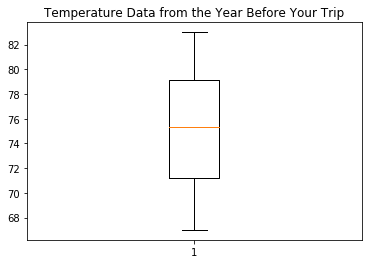

In [51]:
plt.boxplot(temp_data)
plt.title('Temperature Data from the Year Before Your Trip')